In [ ]:
import numpy as np
import pandas as pd
from Borda_count_good import stratified_borda
import matplotlib.pyplot as plt
from matplotlib import pyplot
from Borda_count_unstratified import unstratified_borda

In [2]:
np.random.seed(42)
first_choice_proportion = [0.3374, 0.1782, 0.3262, 0.0494, 0.0233, 0.0764]
second_choice_matrix = [[0.1779, 0.1186, 0.0247, 0.0247, 0.6541],
                                [0.1465, 0.4762, 0.0366, 0.2197, 0.1208],
                                [0.2051, 0.5503, 0.0241, 0.0965, 0.1192],
                                [0.7,0.04,0.05,0.01,0.2],
                                [0.08, 0.45, 0.3, 0.02, 0.15],
                                [0.4181, 0.1818, 0.3636, 0.01818, 0.01818]]
data = pd.read_csv('combined_voting_data_final.csv')
data = data.fillna(0.01)

In [3]:
borda_results = stratified_borda(data, second_choice_matrix, 500, 50)

c:\Users\jerem\Downloads\Election\Borda_count_good.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  first_choice_proportion[0] = row[2]/row[9]
c:\Users\jerem\Downloads\Election\Borda_count_good.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  first_choice_proportion[1] = row[3]/row[9]
c:\Users\jerem\Downloads\Election\Borda_count_good.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  first_choice_proportion[2] = row[4]/ro

C:\Users\jerem\AppData\Local\Temp\ipykernel_50216\3897552512.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
C:\Users\jerem\AppData\Local\Temp\ipykernel_50216\3897552512.py:25: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left=min(party_seats), right=max(party_seats))


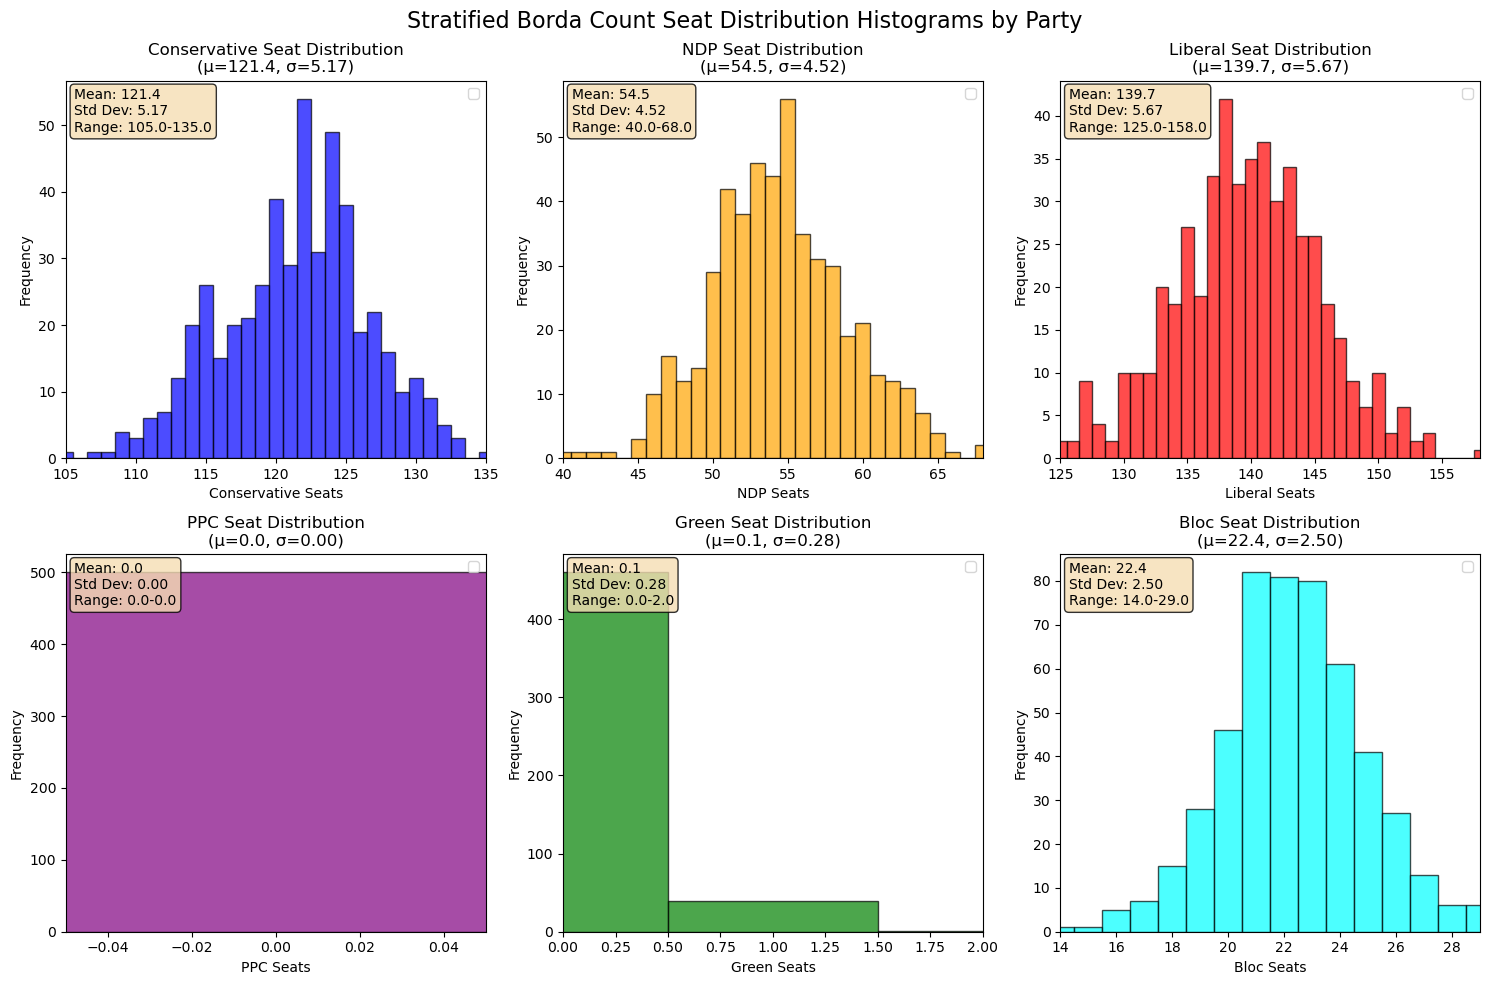

In [4]:
parties = ["Conservative", "NDP", "Liberal", "PPC", "Green", "Bloc"]
colors = {
        "Conservative": "blue",
        "NDP": "orange", 
        "Liberal": "red",
        "PPC": "purple",
        "Green": "green",
        "Bloc": "cyan"
    }

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Stratified Borda Count Seat Distribution Histograms by Party', fontsize=16)
for idx, party in enumerate(parties):
    party_seats = borda_results[idx]
    mean_seats = sum(party_seats) / len(party_seats)
    std_dev = (sum((seats - mean_seats) ** 2 for seats in party_seats) / len(party_seats)) ** 0.5
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]
    bins = range(int(min(party_seats)), int(max(party_seats) + 2))
    ax.hist(party_seats, bins=bins, edgecolor='black', color=colors[party], 
                   alpha=0.7, align='left')
    #ax.axvline(mean_seats, color='red', linestyle='--', linewidth=2, 
                      #label=f'Mean: {mean_seats:.1f}')
    ax.set_xlim(left=min(party_seats), right=max(party_seats))
    ax.set_xlabel(f'{party} Seats')
    ax.set_ylabel('Frequency')
    ax.set_title(f'{party} Seat Distribution\n(μ={mean_seats:.1f}, σ={std_dev:.2f})')
    ax.legend()
    #ax.grid(True, alpha=0.3)
    stats_text = f'Mean: {mean_seats:.1f}\nStd Dev: {std_dev:.2f}\nRange: {min(party_seats)}-{max(party_seats)}'
    ax.text(0.02, 0.98, stats_text, transform=ax.transAxes, 
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
plt.tight_layout()
plt.show()


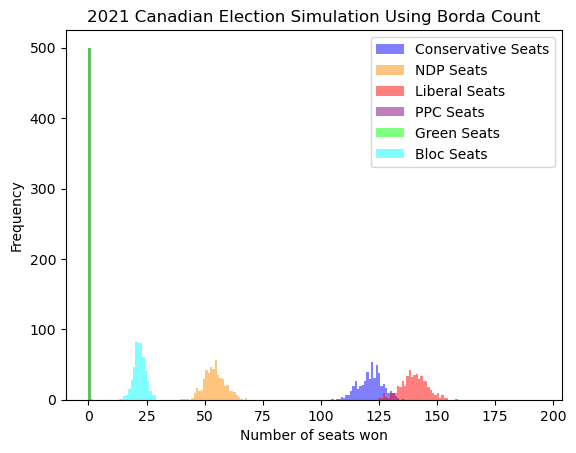

In [5]:
import matplotlib.colors as mcolors
bins = np.linspace(0,194,194)
pyplot.hist(borda_results[0], bins, alpha = 0.5, label = 'Conservative Seats', color='blue')
pyplot.hist(borda_results[1], bins, alpha = 0.5, label = 'NDP Seats', color='darkorange')
pyplot.hist(borda_results[2], bins, alpha = 0.5, label = 'Liberal Seats', color='red')
pyplot.hist(borda_results[3], bins, alpha = 0.5, label = 'PPC Seats', color='purple')
pyplot.hist(borda_results[4], bins, alpha = 0.5, label = 'Green Seats', color='lime')
pyplot.hist(borda_results[5], bins, alpha = 0.5, label = 'Bloc Seats', color='cyan')
pyplot.legend(loc='upper right')
pyplot.xlabel("Number of seats won")
pyplot.ylabel('Frequency')
pyplot.title('2021 Canadian Election Simulation Using Borda Count')
pyplot.show()


In [6]:
x = [borda_results[0][0],
    borda_results[1][0],
    borda_results[2][0],
    borda_results[3][0],
    borda_results[4][0],
    borda_results[5][0]]
sum(x)

338.0

In [7]:
print(borda_results[0][80:90])
print(borda_results[1][80:90])
print(borda_results[2][80:90])
print(borda_results[3][80:90])
print(borda_results[4][80:90])
print(borda_results[5][80:90])

[125. 125. 128. 109. 128. 119. 127. 117. 126. 123.]
[55. 56. 49. 59. 51. 65. 47. 56. 50. 46.]
[133. 128. 139. 145. 139. 130. 140. 145. 140. 143.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[25. 29. 22. 25. 20. 24. 24. 20. 22. 26.]


In [8]:
stratified_borda(data, second_choice_matrix,5,5)

[array([128., 122., 135., 116., 131.]),
 array([74., 75., 70., 78., 81.]),
 array([114., 125., 104., 120., 107.]),
 array([0., 0., 0., 0., 1.]),
 array([0., 0., 2., 1., 0.]),
 array([22., 16., 27., 23., 18.])]

In [9]:
var = [(np.var(borda_results[0])**(0.5))/(np.mean(borda_results[0])),
    (np.var(borda_results[1])**(0.5))/(np.mean(borda_results[1])),
    (np.var(borda_results[2])**(0.5))/(np.mean(borda_results[2])),
    (np.var(borda_results[3])**(0.5))/(np.mean(borda_results[3])),
    (np.var(borda_results[4])**(0.5))/(np.mean(borda_results[4])),
    (np.var(borda_results[5])**(0.5))/(np.mean(borda_results[5]))]
var

C:\Users\jerem\AppData\Local\Temp\ipykernel_50216\2795452261.py:4: RuntimeWarning: invalid value encountered in scalar divide
  (np.var(borda_results[3])**(0.5))/(np.mean(borda_results[3])),


[0.04263420225118799,
 0.08303042286685686,
 0.04061137744848683,
 nan,
 3.4336578089320398,
 0.1117844256796571]

In [10]:
row = data.loc[337]
row[2]

C:\Users\jerem\AppData\Local\Temp\ipykernel_50216\3798189615.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  row[2]


1184.0

In [11]:
results_unstrat = unstratified_borda(data, second_choice_matrix, 500)

c:\Users\jerem\Downloads\Election\Borda_count_unstratified.py:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  first_choice_proportion[0] = row[2]/row[9]
c:\Users\jerem\Downloads\Election\Borda_count_unstratified.py:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  first_choice_proportion[1] = row[3]/row[9]
c:\Users\jerem\Downloads\Election\Borda_count_unstratified.py:44: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  first_choice_p

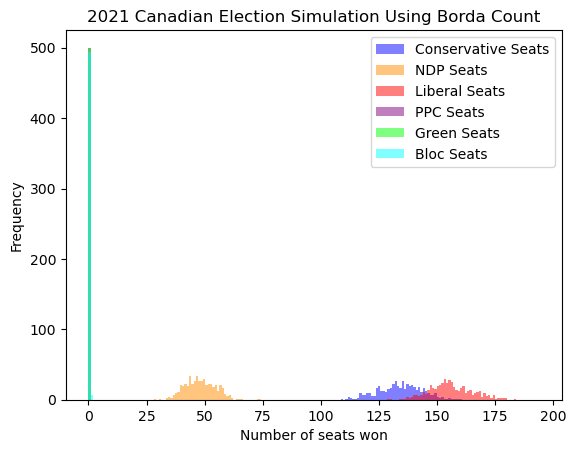

In [12]:
import matplotlib.colors as mcolors
bins = np.linspace(0,194,194)
pyplot.hist(results_unstrat[0], bins, alpha = 0.5, label = 'Conservative Seats', color='blue')
pyplot.hist(results_unstrat[1], bins, alpha = 0.5, label = 'NDP Seats', color='darkorange')
pyplot.hist(results_unstrat[2], bins, alpha = 0.5, label = 'Liberal Seats', color='red')
pyplot.hist(results_unstrat[3], bins, alpha = 0.5, label = 'PPC Seats', color='purple')
pyplot.hist(results_unstrat[4], bins, alpha = 0.5, label = 'Green Seats', color='lime')
pyplot.hist(results_unstrat[5], bins, alpha = 0.5, label = 'Bloc Seats', color='cyan')
pyplot.legend(loc='upper right')
pyplot.xlabel("Number of seats won")
pyplot.ylabel('Frequency')
pyplot.title('2021 Canadian Election Simulation Using Borda Count')
pyplot.show()

C:\Users\jerem\AppData\Local\Temp\ipykernel_50216\525521608.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
C:\Users\jerem\AppData\Local\Temp\ipykernel_50216\525521608.py:25: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left=min(party_seats), right=max(party_seats))


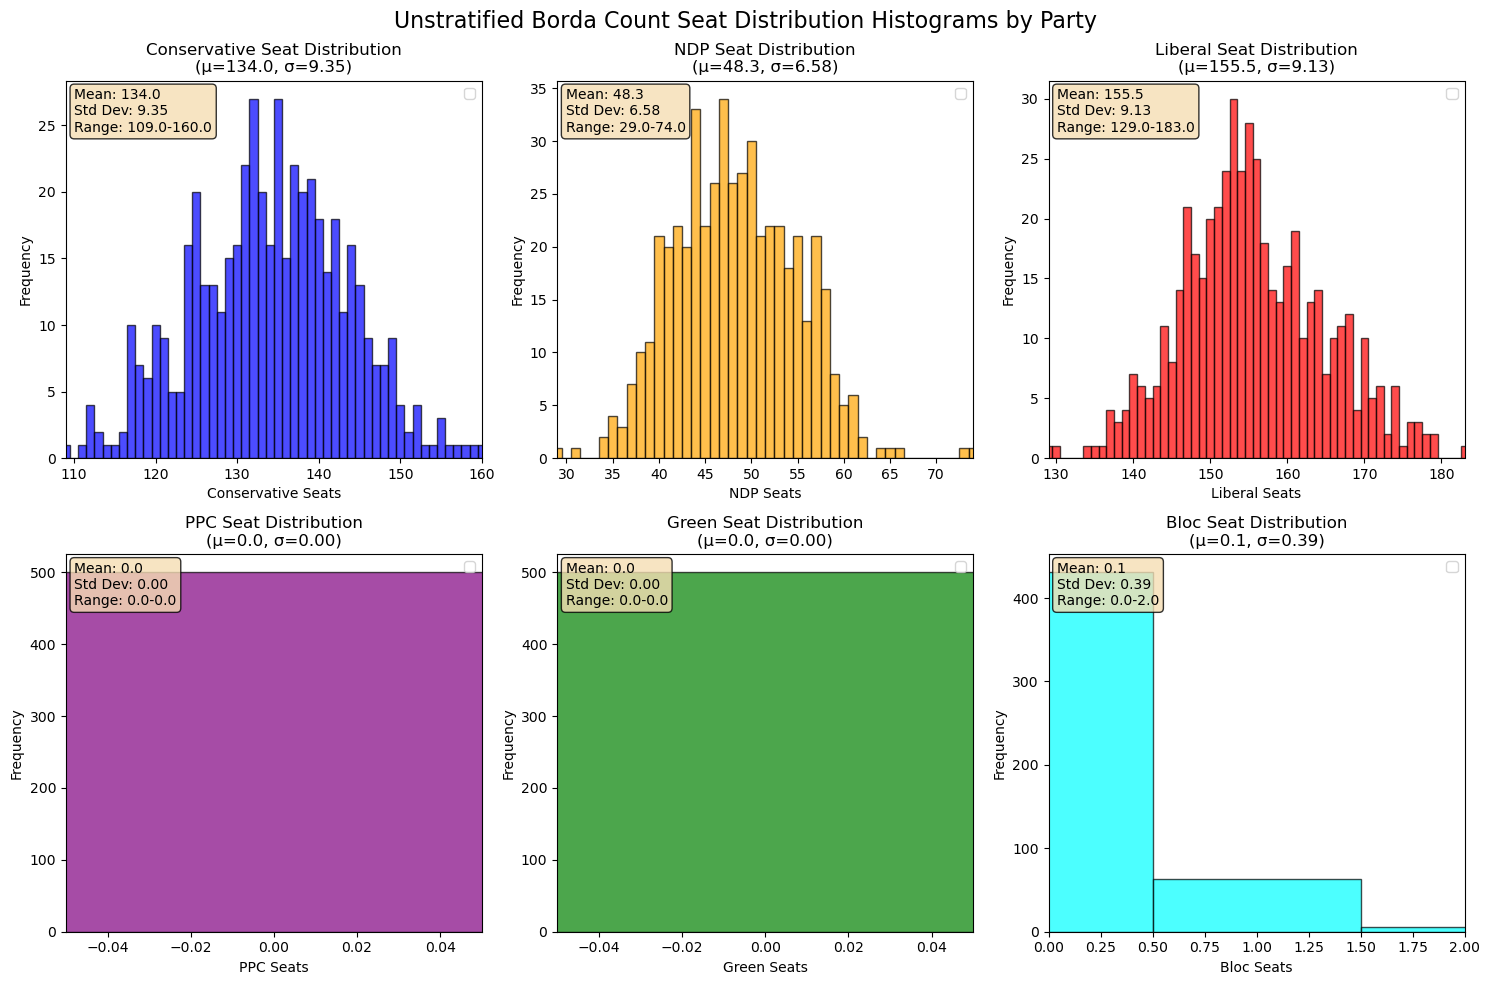

In [13]:
parties = ["Conservative", "NDP", "Liberal", "PPC", "Green", "Bloc"]
colors = {
        "Conservative": "blue",
        "NDP": "orange", 
        "Liberal": "red",
        "PPC": "purple",
        "Green": "green",
        "Bloc": "cyan"
    }

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Unstratified Borda Count Seat Distribution Histograms by Party', fontsize=16)
for idx, party in enumerate(parties):
    party_seats = results_unstrat[idx]
    mean_seats = sum(party_seats) / len(party_seats)
    std_dev = (sum((seats - mean_seats) ** 2 for seats in party_seats) / len(party_seats)) ** 0.5
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]
    bins = range(int(min(party_seats)), int(max(party_seats) + 2))
    ax.hist(party_seats, bins=bins, edgecolor='black', color=colors[party], 
                   alpha=0.7, align='left')
    #ax.axvline(mean_seats, color='red', linestyle='--', linewidth=2, 
                      #label=f'Mean: {mean_seats:.1f}')
    ax.set_xlim(left=min(party_seats), right=max(party_seats))
    ax.set_xlabel(f'{party} Seats')
    ax.set_ylabel('Frequency')
    ax.set_title(f'{party} Seat Distribution\n(μ={mean_seats:.1f}, σ={std_dev:.2f})')
    ax.legend()
    #ax.grid(True, alpha=0.3)
    stats_text = f'Mean: {mean_seats:.1f}\nStd Dev: {std_dev:.2f}\nRange: {min(party_seats)}-{max(party_seats)}'
    ax.text(0.02, 0.98, stats_text, transform=ax.transAxes, 
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
plt.tight_layout()
plt.show()

In [14]:
var_strat = [(np.var(borda_results[0])**(0.5))/(np.mean(borda_results[0])),
    (np.var(borda_results[1])**(0.5))/(np.mean(borda_results[1])),
    (np.var(borda_results[2])**(0.5))/(np.mean(borda_results[2])),
    (np.var(borda_results[3])**(0.5))/(np.mean(borda_results[3])),
    (np.var(borda_results[4])**(0.5))/(np.mean(borda_results[4])),
    (np.var(borda_results[5])**(0.5))/(np.mean(borda_results[5]))]

var_unstrat = [(np.var(results_unstrat[0])**(0.5))/(np.mean(results_unstrat[0])),
    (np.var(results_unstrat[1])**(0.5))/(np.mean(results_unstrat[1])),
    (np.var(results_unstrat[2])**(0.5))/(np.mean(results_unstrat[2])),
    (np.var(results_unstrat[3])**(0.5))/(np.mean(results_unstrat[3])),
    (np.var(results_unstrat[4])**(0.5))/(np.mean(results_unstrat[4])),
    (np.var(results_unstrat[5])**(0.5))/(np.mean(results_unstrat[5]))]
for i in range(0,6):
    print(var_strat[i]*100)
    print(var_unstrat[i]*100)
    print("----")

4.263420225118799
6.975099268728019
----
8.303042286685686
13.611446628521245
----
4.061137744848683
5.873624777706634
----
nan
nan
----
343.365780893204
nan
----
11.17844256796571
259.4866727470475
----


C:\Users\jerem\AppData\Local\Temp\ipykernel_50216\1310095543.py:4: RuntimeWarning: invalid value encountered in scalar divide
  (np.var(borda_results[3])**(0.5))/(np.mean(borda_results[3])),
C:\Users\jerem\AppData\Local\Temp\ipykernel_50216\1310095543.py:11: RuntimeWarning: invalid value encountered in scalar divide
  (np.var(results_unstrat[3])**(0.5))/(np.mean(results_unstrat[3])),
C:\Users\jerem\AppData\Local\Temp\ipykernel_50216\1310095543.py:12: RuntimeWarning: invalid value encountered in scalar divide
  (np.var(results_unstrat[4])**(0.5))/(np.mean(results_unstrat[4])),


In [15]:
var = [np.var(results_unstrat[0]),
       np.var(results_unstrat[1]),
       np.var(results_unstrat[2]),
       np.var(results_unstrat[3]),
       np.var(results_unstrat[4]),
       np.var(results_unstrat[5])]
np.sqrt(var)

array([9.34760953, 6.57705101, 9.13442631, 0.        , 0.        ,
       0.38923001])

In [16]:
import random
riding_number = random.randint(0,337)
row = data.loc[1]
row[2]

C:\Users\jerem\AppData\Local\Temp\ipykernel_50216\2177517662.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  row[2]


12278.0

In [17]:
data.head()

,Electoral.District.Number.Numéro.de.circonscription,Electoral.District.Name.Nom.de.circonscription,Conservative Party of Canada,New Democratic Party,Liberal Party of Canada,People's Party of Canada,Green Party of Canada,Bloc Québécois,Rejected.Ballots.Bulletins.rejetés,Total.Votes.Total.des.votes,Electors.Électeurs
0,10001,Avalon/Avalon,12738.0,5151.0,18608.0,647.00,0.01,0.01,273,37417,70903
1,10002,Bonavista--Burin--Trinity/Bonavista--Burin--Tr...,12278.0,2484.0,13972.0,1257.00,0.01,0.01,482,30473,59605
2,10003,Coast of Bays--Central--Notre Dame/Coast of Ba...,14927.0,2261.0,14646.0,0.01,0.01,0.01,695,32529,63631
3,10004,Labrador/Labrador,2930.0,2297.0,4119.0,307.00,0.01,0.01,94,9747,20239
4,10005,Long Range Mountains/Long Range Mountains,14344.0,4347.0,16178.0,1578.00,0.01,0.01,461,36908,70208


In [ ]:
#%pip install spicy
from spicy import stats
fstat1 = ((np.var(results_unstrat[1])**(0.5))/(np.mean(results_unstrat[1])))/((np.var(borda_results[1])**(0.5))/(np.mean(borda_results[1])))
(1 - stats.f.cdf(fstat1,499,499))

0.002005888843914505